# The Oguri Model

NOTE: Remember to clean up code and add comments / reference resources before submission

In this notebook, we will ...

**Learning Objectives**

1. ...

**Import modules**
Begin by importing the modules to be used in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dateutil import parser
import matplotlib.colors as mpl_colors

## Japanese Race Horses

Let's read in the data here:

In [2]:
# read in the Japanese Race Horse racing data
df_jp = pd.read_csv('jpracehorses.csv', header=1)

df_jp.head()

,NAME,DATE,RACENAME,COURSE,TRACK,DISTANCE,CONDITION,FINISHTIME,FINISHPOSITION,MARGIN,WEIGHT,SEX
0,Special Week,"Dec 26,1999",ARIMA KINEN (GRAND PRIX) G1,NAKAYAMA,TURF,2500M,FIRM,2:37.2,2,0.0,464 (-4),Stallion
1,Special Week,"Nov 28,1999",JAPAN CUP G1,TOKYO,TURF,2400M,FIRM,2:25.5,1,0.2,468 (-2),Stallion
2,Special Week,"Oct 31,1999",TENNO SHO(AUTUMN) G1,TOKYO,TURF,2000M,FIRM,1:58.0,1,0.1,470 (-16),Stallion
3,Special Week,"Oct 10,1999",KYOTO DAISHOTEN G2,KYOTO,TURF,2400M,FIRM,2:25.1,7,0.8,486 (+6),Stallion
4,Special Week,"Jul 11,1999",TAKARAZUKA KINEN G1,HANSHIN,TURF,2200M,FIRM,2:12.6,2,0.5,480 (+4),Stallion


In [3]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html
# Data Preprocessing
# Converts string date to datetime format, then converts to Year-Month-Date format
df_jp['DATE'] = pd.to_datetime(df_jp['DATE'], format="%b %d,%Y", errors='coerce')
df_jp['DATE'] = df_jp['DATE'].dt.strftime('%Y-%m-%d')
df_jp['DISTANCE'] = df_jp['DISTANCE'].astype(str).str.replace('M', '')
df_jp['DISTANCE'] = pd.to_numeric(df_jp['DISTANCE'],errors='coerce')
df_jp['FINISHPOSITION'] = pd.to_numeric(df_jp['FINISHPOSITION'],errors='coerce')
#TODO: Convert finish time into all seconds, and to convert from string into float

def convert_time_jp(time):
    # TODO: check for inv. values if needed
    try:
        parts = str(time).split(':')
        if len(parts) != 2:
            return np.nan
        mins, secs = int(parts[0]), float(parts[1])
        res = (mins * 60) + secs
    except Exception as e:
        return np.nan
    return res

df_jp['FINISHTIME'] = df_jp['FINISHTIME'].apply(convert_time_jp)
df_jp['MARGIN'] = pd.to_numeric(df_jp['MARGIN'],errors='coerce')
df_jp['WEIGHT'] = df_jp['WEIGHT'].astype(str).str.extract(r'(\d+)').astype(float)

In [4]:
pd.set_option('display.max_rows', None) # this is required to see all of the rows in the dataset.
#display(df_jp)
df_jp.head()
#df_jp.groupby('NAME')['MARGIN'].mean().sort_values(ascending=False)

,NAME,DATE,RACENAME,COURSE,TRACK,DISTANCE,CONDITION,FINISHTIME,FINISHPOSITION,MARGIN,WEIGHT,SEX
0,Special Week,1999-12-26,ARIMA KINEN (GRAND PRIX) G1,NAKAYAMA,TURF,2500.0,FIRM,157.2,2.0,0.0,464.0,Stallion
1,Special Week,1999-11-28,JAPAN CUP G1,TOKYO,TURF,2400.0,FIRM,145.5,1.0,0.2,468.0,Stallion
2,Special Week,1999-10-31,TENNO SHO(AUTUMN) G1,TOKYO,TURF,2000.0,FIRM,118.0,1.0,0.1,470.0,Stallion
3,Special Week,1999-10-10,KYOTO DAISHOTEN G2,KYOTO,TURF,2400.0,FIRM,145.1,7.0,0.8,486.0,Stallion
4,Special Week,1999-07-11,TAKARAZUKA KINEN G1,HANSHIN,TURF,2200.0,FIRM,132.6,2.0,0.5,480.0,Stallion


## Hong Kong Race Horses

Let's read in the data here:

In [5]:
# read in the Japanese Race Horse racing data
df_hk = pd.read_csv('hkracehorses.csv', header=1)

df_hk.head()

,NAME,DATE,RACENAME,COURSE,TRACK,DISTANCE,CONDITION,FINISHTIME,FINISHPOSITION,MARGIN,WEIGHT,SEX
0,AURORA LADY (J066),11/02/25,149,HAPPY VALLEY,Turf,1200,GOOD TO FIRM,1.09.09,3,1-1/4,124,Stallion
1,AURORA LADY (J066),"Oct 22,2025",119,HAPPY VALLEY,Turf,1000,GOOD,0.56.82,4,3-3/4,130,Stallion
2,AURORA LADY (J066),"Jul 16,2025",846,HAPPY VALLEY,Turf,1200,GOOD TO FIRM,1.08.65,3,3-1/2,119,Stallion
3,AURORA LADY (J066),"Jun 28,2025",794,SHA TIN,Turf,1000,GOOD,0.56.56,6,5-1/2,120,Stallion
4,AURORA LADY (J066),06/04/25,736,HAPPY VALLEY,Turf,1200,GOOD TO YIELDING,1.10.07,6,2-1/2,129,Stallion


In [6]:
df_hk['NAME'] = df_hk['NAME'].str.replace(r'\s*\([^)]*\)', '', regex=True)
# Parser changes all of the date entries to be in the same format, and strftime changes it into year-month-day format
# HK dataset recorded dates in different formats, so could not be cleaned the same way as JP set.
# https://stackoverflow.com/questions/48384376/converting-multiple-date-formats-into-one-format-python
df_hk['DATE'] = df_hk['DATE'].astype(str).map(parser.parse)
df_hk['DATE'] = df_hk['DATE'].dt.strftime('%Y-%m-%d')
df_hk['DISTANCE'] = pd.to_numeric(df_hk['DISTANCE'],errors='coerce').astype(float)
df_hk['FINISHPOSITION'] = pd.to_numeric(df_hk['FINISHPOSITION'],errors='coerce')

def convert_time_hk(time):
    # TODO: check for inv. values if needed
    try:
        parts = str(time).split('.')
        if len(parts) != 3:
            return np.nan
        mins, secs, centisecs, = int(parts[0]), int(parts[1]), int(parts[2])
        res = (mins * 60) + secs + (centisecs / 100.0)
    except ValueError as e:
        print(f"Invalid value '{time}'")
        return np.nan
    return res

def convert_margin_hk(margin):
    # TODO: check for inv. values if needed
    try:
        margin = str(margin)
        if '-' in margin:
            whole, frac = margin.split('-')
            # invalid val
            if '/' not in frac:
                return np.nan
            whole = float(whole)
            num, den = map(int, frac.split('/'))
            return whole + (float(num) / den)
        elif '/' in margin:
            num, den = map(int, margin.split('/'))
            return whole + (float(num) / den)
        else:
            return float(margin)
    except Exception as e:
        return np.nan

df_hk['FINISHTIME'] = df_hk['FINISHTIME'].apply(convert_time_hk)
df_hk['MARGIN'] = df_hk['MARGIN'].apply(convert_margin_hk)
df_hk['WEIGHT'] = pd.to_numeric(df_hk['WEIGHT'],errors='coerce').astype(float)

In [7]:
df_hk.head()

,NAME,DATE,RACENAME,COURSE,TRACK,DISTANCE,CONDITION,FINISHTIME,FINISHPOSITION,MARGIN,WEIGHT,SEX
0,AURORA LADY,2025-11-02,149,HAPPY VALLEY,Turf,1200.0,GOOD TO FIRM,69.09,3.0,1.25,124.0,Stallion
1,AURORA LADY,2025-10-22,119,HAPPY VALLEY,Turf,1000.0,GOOD,56.82,4.0,3.75,130.0,Stallion
2,AURORA LADY,2025-07-16,846,HAPPY VALLEY,Turf,1200.0,GOOD TO FIRM,68.65,3.0,3.50,119.0,Stallion
3,AURORA LADY,2025-06-28,794,SHA TIN,Turf,1000.0,GOOD,56.56,6.0,5.50,120.0,Stallion
4,AURORA LADY,2025-06-04,736,HAPPY VALLEY,Turf,1200.0,GOOD TO YIELDING,70.07,6.0,2.50,129.0,Stallion


In [8]:
#pd.set_option('display.max_rows', None) # this is required to see all of the rows in the dataset.
#display(df_hk)
#df_hk.head()
#df_hk.groupby('NAME')['FINISHPOSITION'].mean().sort_values(ascending=False)


## Japanese Horses Raw Data Plot

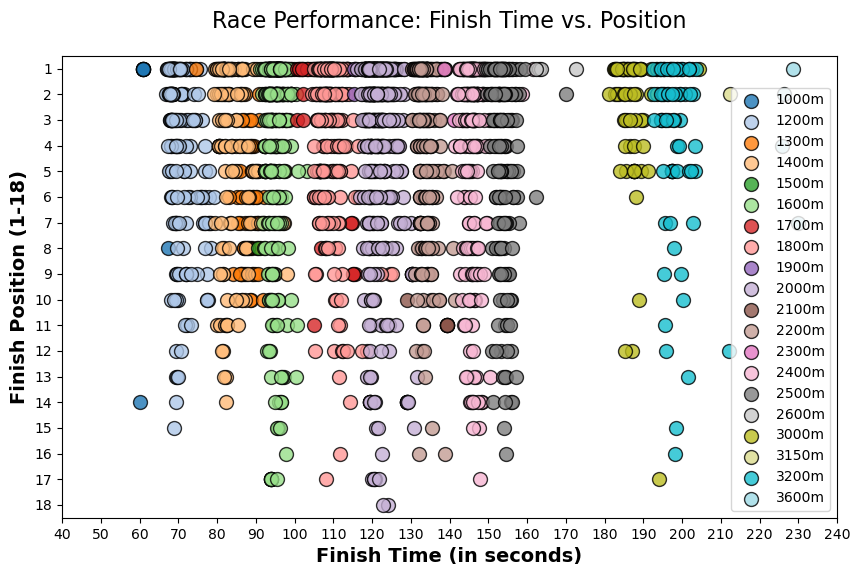

In [9]:
jp_distances = [1000, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 3000, 3150, 3200, 3600]
jp_xticks = [40, 250, 10]

# Code for raw data plot
def raw_data_plot(distances, df, xticks_vars):
    plt.figure(figsize=(10, 6))
    cmap_base = plt.colormaps.get_cmap('tab20')

    colors = cmap_base(np.linspace(0, 1, len(distances)))

    for i, distance in enumerate(distances):
        df_subset = df[df['DISTANCE'] == distance]

        if not df_subset.empty:
            plt.scatter(df_subset['FINISHTIME'], df_subset['FINISHPOSITION'],
                        c=[colors[i]],
                        edgecolor='black',     # Black border for clarity
                        s=100,                 # Marker size
                        alpha=0.8,             # Transparency
                        label=f'{distance}m')
    plt.legend()
    
    plt.xlabel('Finish Time (in seconds)', fontsize=14, fontweight='bold')
    plt.ylabel('Finish Position (1-18)', fontsize=14, fontweight='bold')
    plt.title('Race Performance: Finish Time vs. Position', fontsize=16, pad=20)
    plt.gca().invert_yaxis()
    plt.ylim(18.5, 0.5)
    xticks = plt.xticks(list(range(xticks_vars[0], xticks_vars[1], xticks_vars[2])))
    yticks = plt.yticks(list(range(1, 19)))

raw_data_plot(jp_distances, df_jp, jp_xticks)

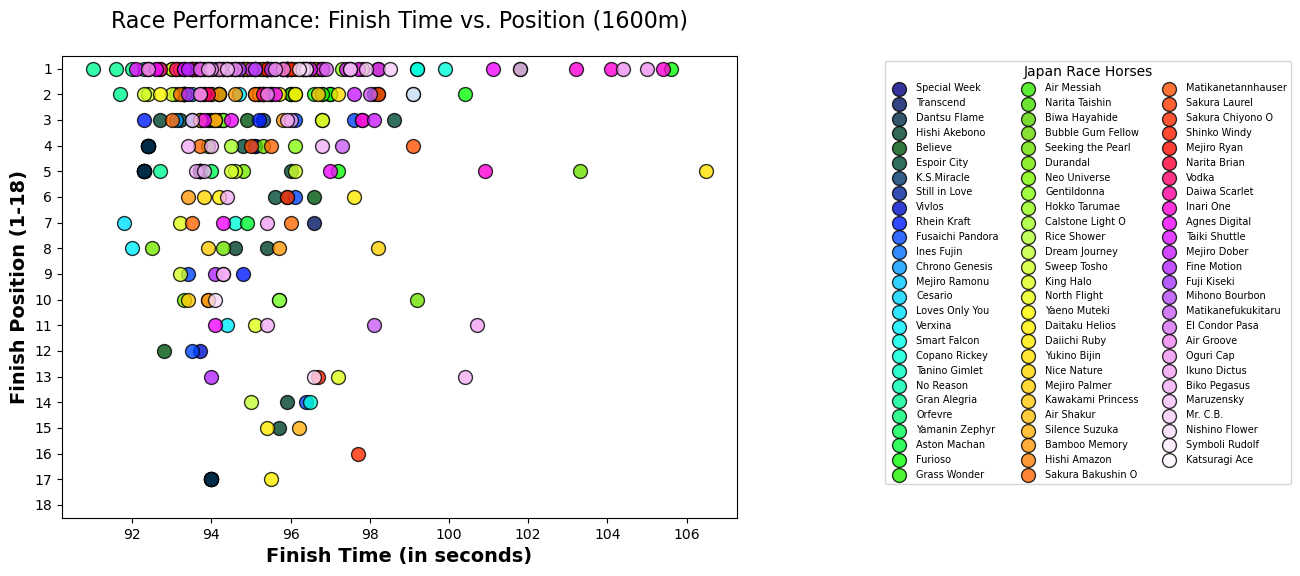

In [10]:
# Code for raw data plot for just distance = 1600
jp_1600_df = df_jp[df_jp['DISTANCE'] == 1600]

def filtered_raw_data_plot(df, df_type):
    unique_horses = df['NAME'].unique()
    num_horses = len(unique_horses)
    
    cmap_base = plt.colormaps.get_cmap('gist_ncar')
    colors = cmap_base(np.linspace(0, 1, num_horses))
    
    plt.figure(figsize=(10, 6))
    for i, horse_name in enumerate(unique_horses):
            df_subset = df[df['NAME'] == horse_name]

            color_index = i % len(colors)

            if not df_subset.empty:
                plt.scatter(df_subset['FINISHTIME'], df_subset['FINISHPOSITION'],
                            c=[colors[color_index]],
                            edgecolor='black',     
                            s=100,               
                            alpha=0.8,           
                            label=horse_name)

    # bbox_to_anchor controls the position of the legend (necessary to get it outside of the plot)
    plt.legend(title=f'{df_type} Race Horses',ncol=3, fontsize=7, bbox_to_anchor=(1.52, 1), loc='upper center')
    # https://www.geeksforgeeks.org/python/matplotlib-pyplot-subplots_adjust-in-python/
    # used to adjust the spacing of the subplots (necessary since the legend is outside of the plot)
    plt.subplots_adjust(right=0.80)
    # color code for individual horses? @andrei
    
    plt.xlabel('Finish Time (in seconds)', fontsize=14, fontweight='bold')
    plt.ylabel('Finish Position (1-18)', fontsize=14, fontweight='bold')
    plt.title('Race Performance: Finish Time vs. Position (1600m)', fontsize=16, pad=20)
    plt.gca().invert_yaxis()
    plt.ylim(18.5, 0.5)
    yticks = plt.yticks(list(range(1, 19)))
    plt.show()


filtered_raw_data_plot(jp_1600_df, 'Japan')

## Hong Kong Horses Raw Data Plot

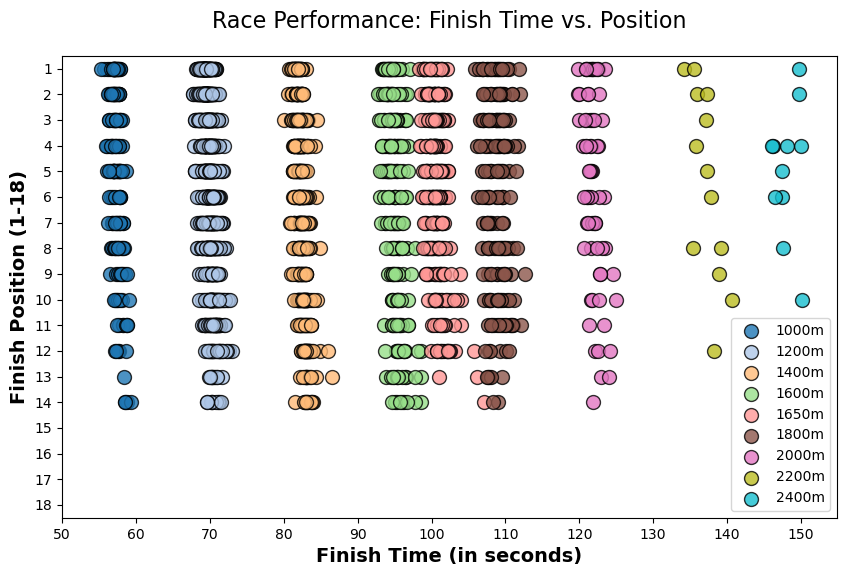

In [11]:
hk_distances = [1000, 1200, 1400, 1600, 1650, 1777, 1800, 2000, 2070, 2200, 2400, 2410]
hk_xticks = [50, 160, 10]

raw_data_plot(hk_distances, df_hk, hk_xticks)

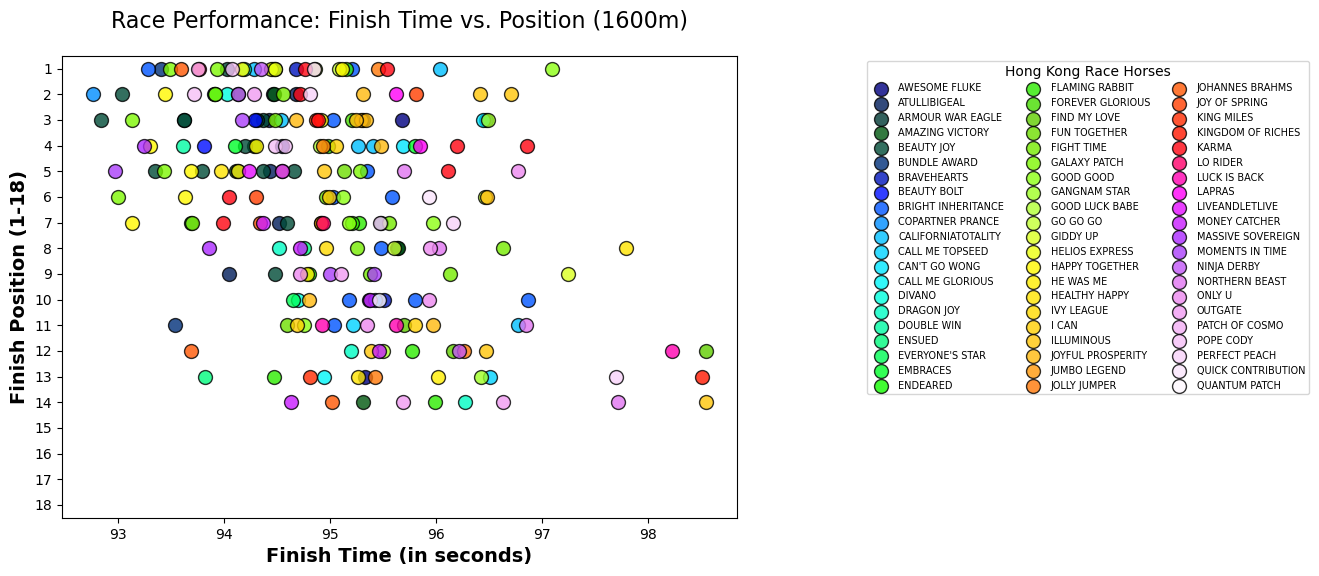

In [12]:
hk_1600_df = df_hk[df_hk['DISTANCE'] == 1600]

filtered_raw_data_plot(hk_1600_df, 'Hong Kong')